# TAREA VISUALIZACIÓN AVANZADA
##  ANÁLISIS FINANCIERO DE APPLE
### Iago Padilha Gómez

En este ejercicio vamos a realizar un análisis financiero simple de la empresa Apple. Este análisis se centrará tanto en la situación financiera como en la evolución en bolsa. El estudio se ubica en el tiempo entre los años 2009 y 2024.

El estudio parte de los datos públicos de la situación financiera de Apple y de los datos recopilados en bolsa. La situación financiera, como empresa que cotiza en bolsa, se presenta todos los cuatrimestres. Mientras que los datos en bolsa son públicos. Para el análisis también aprovechamos los datos de tiendas de Apple en el mundo. Aún así, para facilitar el trabajo de recopilación de datos y no buscar manualmente hemos aprovechado varios datasets recopilados en Kaggle. De esta forma obtenemos los datos de manera rápida. Los enlaces para las fuentes de datos son los siguientes: [estados financieros](https://www.kaggle.com/datasets/jamiedcollins/hjsjdjdjdjd), [stocks](https://www.kaggle.com/datasets/umerhaddii/apple-stock-data-2025) y [datos de tiendas](https://www.kaggle.com/datasets/panoskalsos/apple-stores-by-countryregion).

El notebook se va a dividir en dos partes: preparar todo para el análisis y el trabajo en sí. En la primera parte encontraremos que se importan las librerias, se cargan los archivos y se preparan para su estido. La estructura que seguirá este trabajo será la siguiente:
1. Introducción
2. Evolución de ingresos y crecimiento
3. Rentabilidad
4. Beneficio y retorno al accionista
5. Estructura financiera y balance de situación
6. Valoración de mercado
7. Conclusión

### Importar librerias necesarias

In [1]:
import pandas as pd
import requests
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely.geometry import shape
import numpy as np
from plotly.subplots import make_subplots

### CARGA Y LIMPIEZA DE DATOS:

Como comentabamos, lo primero que haremos será cargar los datos y tratarlos para el análisis posterior.

In [3]:
financial = pd.read_csv('Apple 2009-2024.csv')
financial.head()

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


In [ ]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     object 
 2   Revenue (millions)            16 non-null     object 
 3   Gross Profit (millions)       16 non-null     object 
 4   Op Income (millions)          16 non-null     object 
 5   Net Income (millions)         16 non-null     object 
 6   EPS                           16 non-null     object 
 7   Shares Outstanding            16 non-null     object 
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     object 
 10  Cash on Hand (millions)       16 non-null     object 
 11  Long Term Debt (millions)     16 non-null     object 
 12  Total Liabilities (millions)  16 non-null     object 
 13  Gross M

In [4]:
def to_number(s):
    if pd.isna(s):
        return None
    return (str(s)
            .replace("$", "")
            .replace(",", "")
            .replace("%", "")
            .strip())

for col in financial.columns:
    if col not in ["year", "Year Close Price", "PE ratio"]:
        financial[col] = financial[col].apply(to_number)
        financial[col] = pd.to_numeric(financial[col], errors="coerce")

financial["year"] = pd.to_numeric(financial["year"], errors="coerce").astype(int)

print(financial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     int64  
 2   Revenue (millions)            16 non-null     int64  
 3   Gross Profit (millions)       16 non-null     int64  
 4   Op Income (millions)          16 non-null     int64  
 5   Net Income (millions)         16 non-null     int64  
 6   EPS                           16 non-null     float64
 7   Shares Outstanding            16 non-null     int64  
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     int64  
 10  Cash on Hand (millions)       16 non-null     int64  
 11  Long Term Debt (millions)     16 non-null     int64  
 12  Total Liabilities (millions)  16 non-null     int64  
 13  Gross M

Para el caso de los estados financieros hemos limpiado las variables para poderlas convertir a números. No hicimos más cambios.

In [ ]:
stock = pd.read_csv('apple_stock.csv')
stock.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [ ]:
# Renombrar la columna de fecha y convertir a datetime
stock = stock.rename(columns={"Unnamed: 0": "Date"})
stock["Date"] = pd.to_datetime(stock["Date"])

# Conservar solo lo relevante
stock = stock[["Date", "Adj Close", "Volume"]]

print(stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11107 non-null  datetime64[ns]
 1   Adj Close  11107 non-null  float64       
 2   Volume     11107 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 260.4 KB
None


En este caso lo que hicimos fue quedarnos con las variables que, a priori, consideramos que serán de utilidad. Nos quedamos con la fecha, que no necesita explicación. También con el volumen, ya que podrá ser interesante ver cuando ha habido mas movimientos en los mercados. El precio de acción tenderá a crecer con el paso del tiempo, pero ver el volumen a lo mejor nos facilita el análisis en un periodo de tiempo largo para ser la bolsa. Y por último, nos quedamos con el precio ajustado de cierre, ya que es el único valor que permnite la comparación en el tiempo de las acciones. El precio de cierre es el último precio del día, pero el ajustado corrige el precio para tener en cuenta dividendos, splits, emisiones, fusiones, o derechos preferentes.

In [ ]:
stock = stock[(stock["Date"] >= "2009-01-01") & (stock["Date"] <= "2024-12-31")]
stock.tail()

,Date,Adj Close,Volume
11100,2024-12-24,258.200012,23234700
11101,2024-12-26,259.019989,27237100
11102,2024-12-27,255.589996,42355300
11103,2024-12-30,252.199997,35557500
11104,2024-12-31,250.419998,39480700


Lo último que hacemos para estet dataframe es ajustar las observaciones a la ventana temporal de análisis que habíamos marcado. Los registros venían desde 1980 hasta 2025 pero para este análisis habíamos marcado desde 2009 hasta 2024.

In [ ]:
stores = pd.read_excel('Apple Stores by Country (and Region).xlsx')
stores.head()

,No,Country / Region,Date of first store,First store location,Number of stores
0,1,United States,"May 19, 2001","Tysons Corner Center, Tysons Corner, Virginia",272
1,2,Japan,"November 30, 2003","Ginza, Tokyo",10
2,3,United Kingdom,"November 20, 2004","Regent Street, London",38
3,4,Canada,"May 21, 2005","Yorkdale Shopping Centre, Toronto",28
4,5,Italy,"March 31, 2007","Centro Commerciale Roma Est, Rome",17


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   No                    26 non-null     int64 
 1   Country / Region      26 non-null     object
 2   Date of first store   26 non-null     object
 3   First store location  26 non-null     object
 4   Number of stores      26 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [ ]:
stores['Country / Region'].unique()

array(['United States', 'Japan', 'United Kingdom', 'Canada', 'Italy',
       'Australia', 'China mainland', 'Switzerland', 'Germany', 'France',
       'Spain', 'Hong Kong', 'Netherlands', 'Sweden', 'Brazil', 'Turkey',
       'Belgium', 'United Arab Emirates', 'Macau', 'Mexico', 'Singapore',
       'Taiwan', 'South Korea', 'Austria', 'Thailand'], dtype=object)

In [ ]:
country_mapping = {
    "United States": "United States of America",
    "China mainland": "China",
    "Macau": "Macao",
    "South Korea": "Republic of Korea",
    "Russia": "Russian Federation",
    "Hong Kong": "Hong Kong S.A.R."
}

stores["Country"] = stores["Country / Region"].replace(country_mapping)

In [ ]:
# Convertir fechas
stores["Date of first store"] = pd.to_datetime(stores["Date of first store"], errors="coerce")

# Fecha de corte
cutoff = pd.to_datetime("2024-12-31")

# Calcular antigüedad en años (redondeando hacia abajo)
stores["Store_Age_Years"] = ((cutoff - stores["Date of first store"]).dt.days // 365)


stores = stores[['Country', 'Store_Age_Years', 'Number of stores']]
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           26 non-null     object
 1   Store_Age_Years   26 non-null     int64 
 2   Number of stores  26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 756.0+ bytes


En este caso lo que hemos hecho han sido varias transformaciones. Primero, hemos necesitado retocar los nombres de algunos países para que coincidan con los del mapa que usaremos. Luego modificamos la fecha de apertura para poder hacer un cálculo de cuantos años tiene de presencia en ese país. Así, solo nos quedaremos con los países, los años desde que abrió la primera tienda en ese país y el número de tiendas que tienen actualmente en ese país.

Este dataset nos permite complementar la parte introductoria, dando contexto sobre la empresa y entendiendo su expansión geográfica.

# ANÁLISIS FINANCIERO DE APPLE

## 1. INTRODUCCIÓN:

Apple Inc. es una de las empresas más influyentes y valiosas del mundo. Fue fundada en 1976 por Steve Jobs, Steve Wozniak y Ronald Wayne y en este tiempo ha pasado de ser un fabricante de ordenadores personales a convertirse en un ecosistema global de hardware, software y servicios. Su catálogo abarca desde productos como el iPhone, el Mac y el iPad, hasta servicios digitales como Apple Music, iCloud, Apple TV+ o la App Store, que hoy representan una parte creciente de sus ingresos.

El presente análisis se centra en el periodo 2009–2024, una etapa clave en la consolidación de Apple como líder del sector tecnológico. Durante estos años la compañía ha experimentado transformaciones profundas: el relevo en la dirección ejecutiva tras la era Jobs, la expansión del negocio hacia servicios y wearables, la creciente internacionalización de sus ventas y una evolución bursátil que la ha llevado a superar los tres billones de dólares en capitalización de mercado.

El objetivo del estudio es evaluar la evolución financiera y bursátil de Apple, analizando sus principales magnitudes —ingresos, beneficios, márgenes, estructura financiera y valoración de mercado— para determinar cómo ha sido su desempeño y si, desde una perspectiva de inversión, habría resultado una buena oportunidad en el largo plazo.

Antes de entrar en el análisis financiero vamos a dar un contexto geográfico de Apple.

### Mapa de presencia (en años) en cada país:

In [ ]:
# extraer países para mapas
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
world_geo = requests.get(url).json()

In [ ]:
# --- Crear mapa base ---
map_age = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodbpositron")

# --- Choropleth ---
folium.Choropleth(
    geo_data=world_geo,
    data=stores,
    columns=["Country", "Store_Age_Years"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Store Age (Years)"
).add_to(map_age)

# --- Calcular centroides ---
for _, row in stores.iterrows():
    for feature in world_geo["features"]:
        if feature["properties"]["name"] == row["Country"]:
            geom = shape(feature["geometry"])
            lon, lat = geom.centroid.x, geom.centroid.y
            folium.map.Marker(
                [lat, lon],
                icon=folium.DivIcon(
                    html=f'<div style="font-size:10pt; color:black; text-align:center">{row["Store_Age_Years"]}</div>'
                )
            ).add_to(map_age)
            break
map_age

Encontramos que Apple, a pesar de existir desde 1976, solamnte hay tiendas desde 2001. Evidentemente, la primera localización de Apple se encuentra en Estados Unidos. Posteriormente abre en Japón, Reino Unido y Canadá en ese orden. Posteriormente a estas primeras aperturas (de hace en torno a 20 años) encontramos una ronda de expansión geográfica en torno al año 2009, dependiendo del país año arriba o abajo. Esta expansión de hace unos 15 años se da en los principales paises europeos, Australia y China. Otros paises europeos junto con México y Brasil van a formar parte de otra expansión. La ultima expansión ocurre en el sudeste asiatico hace más de 5 años.

Lo que vemos es una poca expansión de tiendas propias. Apple trabaja principalmente mediante vendedores autorizados. La expansión geográfica se plantea de una forma organizada y con lógica.

### Cantidad de tiendas (número) por país

In [ ]:
# --- Mapa 2: Number of stores ---
map_stores = folium.Map(location=[20, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_geo,
    data=stores,
    columns=["Country", "Number of stores"],
    key_on="feature.properties.name",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Stores"
).add_to(map_stores)

for _, row in stores.iterrows():
    for feature in world_geo["features"]:
        if feature["properties"]["name"] == row["Country"]:
            geom = shape(feature["geometry"])
            lon, lat = geom.centroid.x, geom.centroid.y
            folium.map.Marker(
                [lat, lon],
                icon=folium.DivIcon(
                    html=f'<div style="font-size:10pt; color:black; text-align:center">{row["Number of stores"]}</div>'
                )
            ).add_to(map_stores)
            break
map_stores

Estados Unidos, lógicamente, tiene una gran cantidad de tiendas. Es muy grande la diferencia de cantidad de tiendas con respecto al resto de países. Los siguientes países con gran presencia China y Reino Unido. El lujo y compartir idioma e historia, respectivamente, podrían explicar que tengan tantas tiendas.

El resto de paises tienen siempre entre 20 y 10 tiendas. Salvo  alguno con solamente 2 o 4. Esta distribución viene a reforzar la idea de expansión que tiene Apple. Sus propias tiendas se instalan de forma muy consciente y pensada. Esto permite dar una imagen de exclusividad y único. Se intenta que la experiencia de visitar una tienda Apple sea especial.

Lo que vemos un poco aquí viene a ser la filosofía de Apple. Algo único y diferente. No una marca más de electrónica.

### Evolución de empleados (en número):

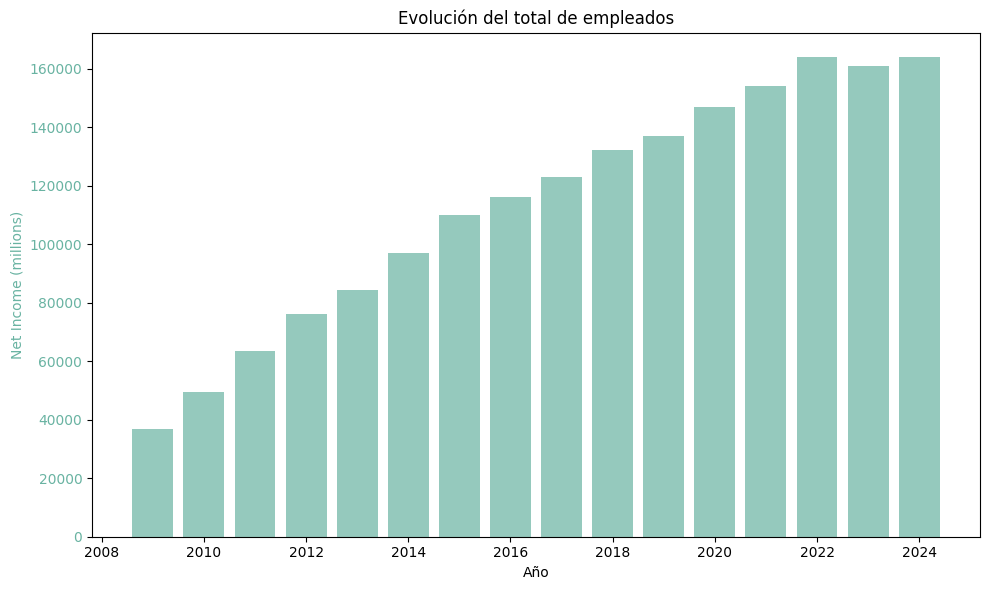

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# --- Barras Net Income ---
ax1.bar(financial["year"], financial["Employees"], color="#69b3a2", alpha=0.7)
ax1.set_xlabel("Año")
ax1.set_ylabel("Net Income (millions)", color="#69b3a2")
ax1.tick_params(axis="y", labelcolor="#69b3a2")

plt.title("Evolución del total de empleados")
fig.tight_layout()
plt.show()

Lo último que vamos a comentar antes de pasar al análisis es el número de empleados. Esto nos da un contexto importante a la hora de estudiar la evolución financiera, ya que nos puede dar pistas sobre la base de su crecimiento.

Lo que observamos es la evolución de empleados propios de Apple. Encontramos un crecimiento constante a lo largo de todo el periodo. Pasando desde menos de 40.000 empleados en 2009 hasta los 160.000 empleados en 2024. Este crecimiento prolongado que comentamos parece que se detiene desde el año 2022. En este año tenían los mismos empleados que en 2024, mientras que en 2023 se reducen hasta 161.000 empleados.

Por lo tanto, esperando como evoluciona en 2025, vemos una empresa en crecimiento constante. Este último parón en contrataciones nos da señales de estar atentos a como evolucionará Apple.

## 2. EVOLUCIÓN DE INGRESOS Y CRECIMIENTO:

La evolución de los ingresos de Apple refleja su transformación de fabricante de hardware a un ecosistema tecnológico global. Entre 2009 y 2024, la compañía ha experimentado un crecimiento sostenido impulsado por el iPhone, los servicios digitales y los dispositivos wearables. Este periodo evidencia su capacidad para diversificar fuentes de ingreso y mantener márgenes elevados incluso en entornos económicos adversos, consolidándose como una de las empresas más rentables y resilientes del sector tecnológico.

En este apartado se analiza la evolución de los ingresos de Apple a lo largo del periodo 2009–2024, identificando las etapas de mayor expansión y los factores que han impulsado su crecimiento. Además, se calcula el CAGR (tasa de crecimiento anual compuesta) para cuantificar el ritmo medio de avance y se examina la productividad por empleado, con el objetivo de evaluar la eficiencia con la que la compañía ha generado ingresos en relación con sus recursos humanos y operativos.

### Evolución de los ingresos (miles de millones $)

In [ ]:
# calculos previos a graficar
start_val = financial["Revenue (millions)"].iloc[0]
end_val = financial["Revenue (millions)"].iloc[-1]
n_years = financial["year"].iloc[-1] - financial["year"].iloc[0]
cagr = (end_val / start_val) ** (1/n_years) - 1

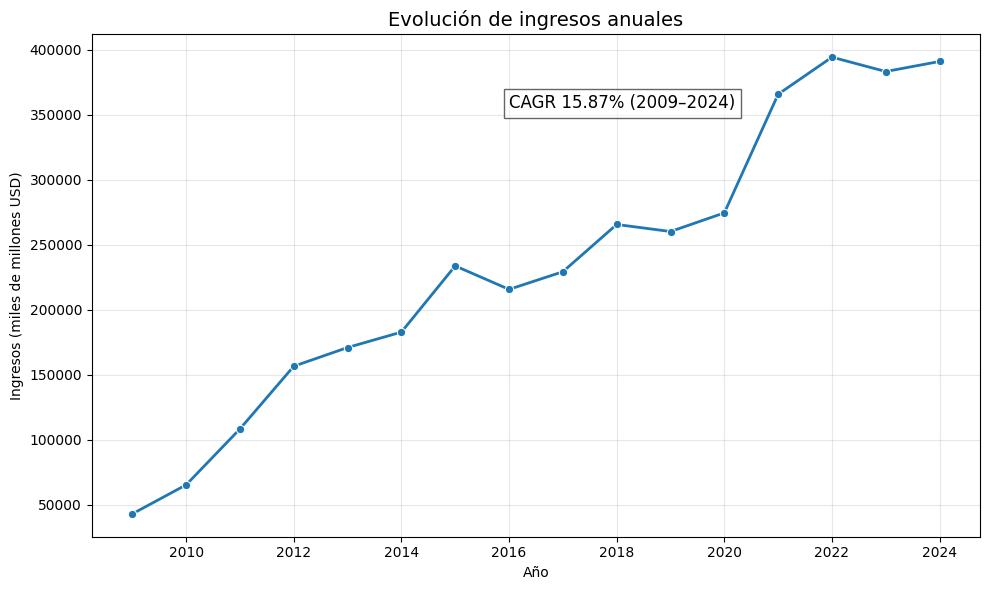

In [ ]:
# --- Plot ---
plt.figure(figsize=(10,6))
sns.lineplot(data=financial, x="year", y="Revenue (millions)", marker="o", linewidth=2)

plt.title("Evolución de ingresos anuales", fontsize=14)
plt.ylabel("Ingresos (miles de millones USD)")
plt.xlabel("Año")

# Anotar CAGR en el gráfico
plt.text(
    financial["year"].iloc[len(financial)//2],
    max(financial["Revenue (millions)"]) * 0.9,
    f"CAGR {cagr:.2%} (2009–2024)",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.6, edgecolor="black")
)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Encontramos que Apple ha tenido un crecimiento de los ingresos sostenido a lo largo del periodo. Podemos estudiar como hasta 2012 ha crecido rápidamente. Hasta 2020 el crecimiento es menos pronunciado, con dos caídas en 2016 y 2019. Luego, gracias a la pandemia hemos visto un salto importante de los ingresos entre 2020 y 2021 para estancarse en los tres últimos años.

Esta última fase ya la habíamos comentado anteriormente con el número de empleados. Así que parece que Apple podría entrar en una nueva fase como empresa. Podríamos pensar que el ciclo de vida de Apple hasta 2012 fue de crecimiento, para posteriormente reducirse ese crecimiento. Excluyendo el salto provocado por la pandemia, vemos que paulatinamente ese crecimiento se va estancando. Así, podríamos decir que Apple entra en el ciclo de vida de empresa conocido como madurez, donde los ingresos son estables. Los proximos pasos de Apple, como empresa, serán la renovación o el declive.

A pesar de esta predicción más catastrofísta, encontramos un CAGR muy bueno. Entendemos el CAGR como la tasa de crecimiento compuesta. Es decir, como hubiera crecido los ingresos de manera constante año a año a casi un 16%. Estos resultados son estupendos para  el periodo. Se trata de aumentar los ingresos en un por seis. Cuando las empresas consolidadas solo crecen a un 5%-10%. Que Apple pueda lograr mantener tasas de crecimiento tan elevadas es algo muy grande.

Los resultados reflejan a una empresa que, tras una etapa de fuerte expansión, ha alcanzado una posición de madurez con ingresos estables y márgenes sólidos. Apple sigue demostrando una notable capacidad para mantener su rentabilidad en niveles excepcionales, gracias a la diversificación de su negocio y a la optimización de costes. Aunque su crecimiento pueda ralentizarse, la eficiencia lograda en los últimos años y la fortaleza de su ecosistema sugieren que la compañía conserva un elevado potencial para sostener su valor y adaptarse a nuevos ciclos de innovación.

### Evolución de la productividad por empleado (M$/empleado):

In [ ]:
# ratios
financial["Revenue per Employee"] = (financial["Revenue (millions)"] * 1e6) / financial["Employees"]
financial["Net Income per Employee"] = (financial["Net Income (millions)"] * 1e6) / financial["Employees"]

# gráfico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=financial["year"],
    y=financial["Revenue per Employee"],
    mode="lines+markers",
    name="Revenue per Employee",
    line=dict(color="blue")
))

fig.add_trace(go.Scatter(
    x=financial["year"],
    y=financial["Net Income per Employee"],
    mode="lines+markers",
    name="Net Income per Employee",
    line=dict(color="green")
))

fig.update_layout(
    title="Productividad por Empleado",
    xaxis_title="Año",
    yaxis_title="USD por empleado",
    hovermode="x unified"
)

fig.show()

En este caso comparamos tanto el ingreso total (*revenue*) como los beneficios (*net income*) con la cantidad de empleados. Esto nos permitirá entender mejor la base del crecimiento de Apple estos años. Podríamos descubrir si el crecimiento se basa en volumen o en ganancia por empleado.

Los ingresos totales por empleado tienen una mayor variabilidad que los beneficios. Aún así, ambos presentan un patron similar: un primer crecimiento, un estancamiento, el boom de la pandemia y por último otro estancamiento. Hasta el año 2012 los ingresos por empleado han crecido, sabiendo que los empleados también, indica que los ingresos han crecido mucho. Esto era algo que estabamos viendo. Posteriormente los ingresos vienen marcados más por un crecimiento de volumen de ventas. Los empleados estaban creciendo y la productividad se mantiene, lo que significa que crece la cantidad que venden. La pandemia ha supuesto un boom para situar la productividad en un nuevo nivel, pero que sigue el mismo patrón que antes.

En resumen, la evolución de los ingresos y beneficios por empleado confirma la transición de Apple hacia una fase de madurez: la compañía continúa generando resultados sobresalientes, pero el impulso ya no proviene tanto del aumento de productividad individual como del volumen total de operaciones. Aun así, el salto registrado durante la pandemia consolidó un nuevo nivel estructural de eficiencia, lo que indica que Apple ha logrado sostener un modelo altamente rentable incluso con un crecimiento más moderado.

## 3. MARGENES DE RENTABILIDAD:

La rentabilidad de Apple refleja su capacidad para transformar ingresos en beneficios a distintos niveles de la cuenta de resultados. A lo largo del periodo 2009–2024, la compañía ha mantenido márgenes elevados gracias a una combinación de innovación constante, control de costes y posicionamiento premium de sus productos. Esta estabilidad en la rentabilidad ha sido uno de los principales pilares de su fortaleza financiera.

En este apartado se analizan los principales márgenes de rentabilidad —margen bruto, operativo y neto— para entender cómo ha evolucionado la eficiencia de Apple en la generación de valor. El estudio permite identificar las etapas de mayor expansión o presión sobre los márgenes y evaluar cómo la estructura de costes y el mix de ingresos han influido en la rentabilidad global de la empresa.

### Evolución de los margenes de rentabilidad (%)

In [ ]:
dfm = financial.copy()

# --- Cálculo de márgenes en % ---
dfm["Gross Margin_%"]     = (dfm["Gross Profit (millions)"] / dfm["Revenue (millions)"]) * 100
dfm["Operating Margin_%"] = (dfm["Op Income (millions)"] / dfm["Revenue (millions)"]) * 100
dfm["Net Margin_%"]       = (dfm["Net Income (millions)"] / dfm["Revenue (millions)"]) * 100

# --- Pasar a formato largo ---
df_long = dfm[["year", "Gross Margin_%", "Operating Margin_%", "Net Margin_%"]] \
    .rename(columns={"year": "Year"}) \
    .melt(id_vars="Year", var_name="Margin Type", value_name="Margin (%)")

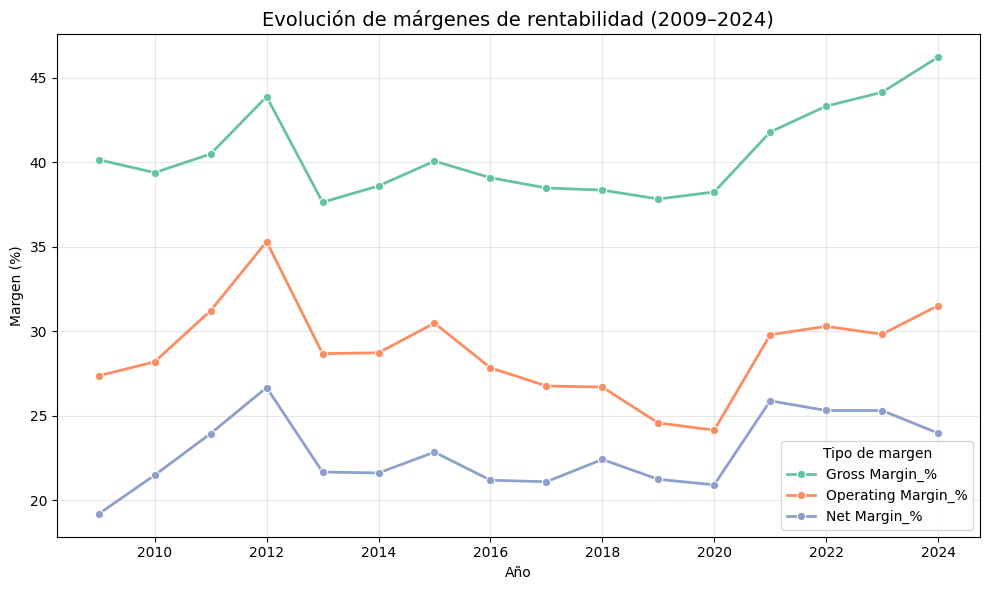

In [ ]:
# --- Plot ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_long, x="Year", y="Margin (%)", hue="Margin Type",
    marker="o", linewidth=2, palette="Set2"
)

plt.title("Evolución de márgenes de rentabilidad (2009–2024)", fontsize=14)
plt.ylabel("Margen (%)")
plt.xlabel("Año")
plt.legend(title="Tipo de margen")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

En este gráfico encontramos los tres siguientes margenes de rentabilidad:
* Margen bruto (*Gross Margin*): mide cuánto beneficio queda tras restar el coste directo de producir los bienes o servicios vendidos; refleja la eficiencia productiva.
* Margen operativo (*Operating Margin*): muestra el beneficio tras descontar los gastos operativos (como marketing o administración); indica la rentabilidad del negocio principal.
* Margen neto (*Net Margin*): representa el beneficio final después de todos los gastos, intereses e impuestos; refleja la rentabilidad total para los accionistas.

Son tres niveles para medir la rentabilidad, que van desde la eficiencia en la producción hasta la rentabilidad total del negocio, pasando por la gestión operativa.

Entre la rentabilidad de negocio y la operativa encontramos una evolución similar. Se trata de lo que veniamos observando con los ingresos. Un crecimiento de la rentabilidad hasta 2012 y dos estancamientos con la pandemia de por medio. Mientras, la rentabilidad de la producción, vemos que esta última fase desde la pandemia sigue siendo cada año más eficiente. Este podría ser un punto de crecimiento para Apple.

En conjunto, los márgenes muestran que Apple ha sabido mantener una estructura de rentabilidad sólida y equilibrada, incluso en contextos de desaceleración económica o cambios en el mercado tecnológico. La mejora reciente en la eficiencia productiva, junto con la estabilidad de los márgenes operativo y neto, sugiere que la compañía conserva un amplio margen de maniobra.

## 4. BENEFICIO Y RETORNO AL ACCIONISTA:

El beneficio neto es uno de los indicadores más directos del éxito financiero de Apple y refleja su capacidad para transformar ingresos en valor real para el accionista. A lo largo del periodo 2009–2024, la compañía ha mantenido una tendencia sólida en su beneficio neto, impulsada por una gestión eficiente y un modelo de negocio diversificado.

En este apartado se analiza la evolución del beneficio neto junto con el beneficio por acción (EPS), que permite observar cómo esa rentabilidad se traduce en valor individual para cada accionista. Esta relación muestra el efecto de las recompras de acciones y la política de distribución de beneficios, claves en la estrategia de retorno al inversor de Apple.

### Evolución del beneficio neto (Millones de $) y el retorno al accionista (& por acción)

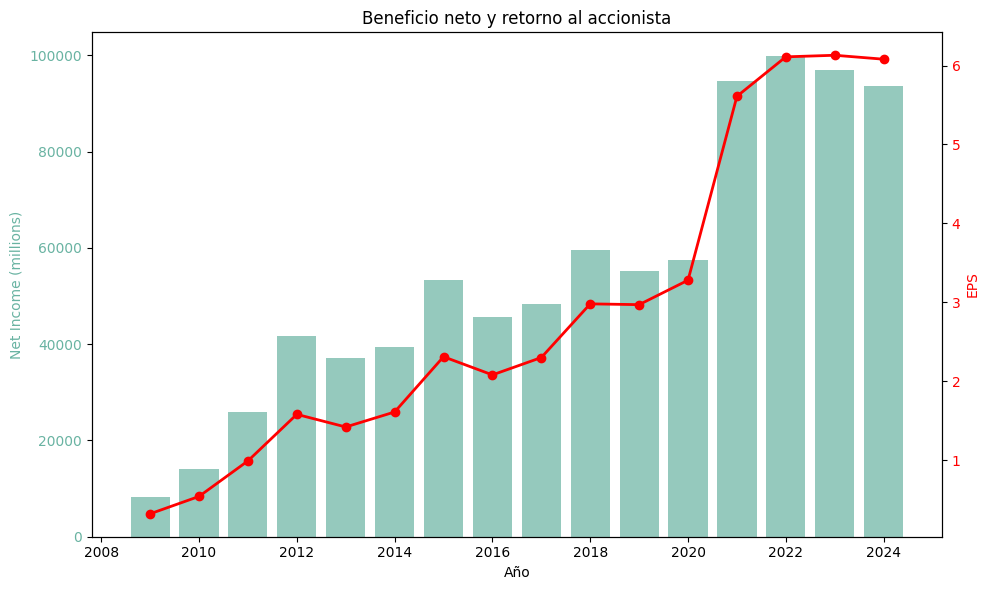

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))
# --- Barras Net Income ---
ax1.bar(financial["year"], financial["Net Income (millions)"], color="#69b3a2", alpha=0.7)
ax1.set_xlabel("Año")
ax1.set_ylabel("Net Income (millions)", color="#69b3a2")
ax1.tick_params(axis="y", labelcolor="#69b3a2")

# --- Segundo eje para EPS ---
ax2 = ax1.twinx()
ax2.plot(financial["year"], financial["EPS"], color="red", marker="o", linewidth=2)
ax2.set_ylabel("EPS", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Beneficio neto y retorno al accionista")
fig.tight_layout()
plt.show()

Aquí encontramos el beneficio neto, que no es más que lo que gana Apple, y el beneficio por acción. En este caso es solamente una medición de cuanto está ganando Apple por cada acción que existe de Apple. Se trata de una forma de medir la rentabilidad desde el punto de vista del accionista.

Lo que encontramos es, de nuevo, tres situaciones. Un crecimiento constante hasta el año 2012. Luego entre 2012 y 2019 encontramos el patrón de año de crecimiento (2012, 2015 y 2018) con dos años posteriores de menor beneficio. Es significativo que la caida del beneficio se da un año antes de la caida de los ingresos que encontrabamos antes. La pandemia, posteriormente, dio un gran empuje a los beneficios de Apple. Luego encontramos una caida de los beneficios pero, reseñable, en cuanto al beneficio por acción se queda estancado.

En conjunto, la evolución del beneficio neto y del beneficio por acción confirma la fortaleza del modelo financiero de Apple, capaz de mantener la rentabilidad incluso en fases de menor crecimiento. La estabilidad del EPS tras la pandemia refleja el impacto de las recompras de acciones y la gestión eficiente del capital, que han permitido sostener el valor para el accionista a pesar de la moderación del beneficio total. Todo apunta a una compañía en fase de madurez, donde el foco ya no está tanto en expandir los beneficios, sino en preservar la rentabilidad y maximizar el retorno al inversor.

## 5.

## 5. ESTRUCTURA FINANCIERA Y BALANCE:

## 5.1. Estructura financiera:

La estructura financiera de Apple revela cómo la compañía gestiona su equilibrio entre liquidez y endeudamiento, es decir, entre la caja disponible y la deuda a largo plazo. Analizar esta evolución permite comprender hasta qué punto su crecimiento se ha apoyado en recursos propios o en financiación externa.

Durante el periodo 2009–2024, Apple ha pasado de tener una posición prácticamente libre de deuda a convertirse en una de las empresas con mayor capacidad de generación de caja del mundo, utilizando el endeudamiento como herramienta estratégica para optimizar su estructura de capital y financiar recompras de acciones. En este apartado se analiza la evolución de la caja (Cash on Hand), la deuda a largo plazo (Long-Term Debt) y el ratio de apalancamiento (Debt/EBITDA), con el fin de evaluar la solidez y flexibilidad financiera que sustentan la rentabilidad y estabilidad de la compañía.

### Evolución de caja y deuda (millones de $):

In [ ]:
# poner deuda como negativa
financial["Long Term Debt (millions)"] = -financial["Long Term Debt (millions)"]

# gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=financial["year"],
    y=financial["Cash on Hand (millions)"],
    name="Cash on Hand",
    marker_color="green"
))

fig.add_trace(go.Bar(
    x=financial["year"],
    y=financial["Long Term Debt (millions)"],
    name="Long Term Debt",
    marker_color="red"
))

# añadir deuda neta como línea
financial["Net Debt (millions)"] = financial["Long Term Debt (millions)"] + financial["Cash on Hand (millions)"]

fig.add_trace(go.Scatter(
    x=financial["year"],
    y=financial["Net Debt (millions)"],
    mode="lines+markers",
    name="Net Debt",
    line=dict(color="black", dash="dash")
))

fig.update_layout(
    title="Cash vs Long Term Debt (con Net Debt)",
    xaxis_title="Año",
    yaxis_title="Millones USD",
    barmode="relative",
    hovermode="x unified"
)

fig.show()

Aquí encontramos representada la caja (*cash on hand*) y la deuda a largo plazo (*long term debt*). La primera se trata del dinero y equivalentes en efectivo que tiene Apple, la parte más liquida de sus activos. Mientras que la segunda son las obligaciones financieras a devolver por Apple a más de un año. Luego tenemos la ratio deuda deuda/efectivo.

Para Apple, vemos que la deuda no existía hasta el año 2013. Momento en el que consideramos un cambio de tendencia en las finanzas de la empresa. A partir de entonces la deuda crece más rápido que la caja. Posteriormente ha aumentado el efectivo considerablemente y ha perdido gran cantidad de caja en plena pandemia mientras que la deuda se mantenía estable. Aun así, en los últimos años vemos un cambio de tendencia. La deuda se ha ido reduciendo mientras que el efectivo ha crecido. La ratio deuda/efectivo vuelve a crecer dirección a una situación positiva.  

En conjunto, la evolución de la caja y la deuda muestra una gestión financiera estratégica y controlada. Apple ha utilizado el endeudamiento como herramienta para optimizar su estructura de capital, no por necesidad de liquidez, sino para financiar recompras de acciones y mantener su atractivo para los inversores. La reciente reducción de la deuda y el aumento del efectivo reflejan una posición de fortaleza y flexibilidad, que permite a la compañía afrontar nuevas inversiones o turbulencias económicas sin comprometer su estabilidad.

### Evolución del apalancamiento (%):

In [ ]:
# ratio de apalancamiento
financial["Debt Ratio"] = financial["Total Liabilities (millions)"] / financial["Total Assets (millions)"]

# gráfico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=financial["year"],
    y=financial["Debt Ratio"],
    mode="lines+markers",
    name="Liabilities / Assets",
    line=dict(color="firebrick")
))

fig.update_layout(
    title="Apalancamiento: Total Liabilities / Total Assets",
    xaxis_title="Año",
    yaxis_title="Ratio",
    yaxis=dict(tickformat=".0%"),
    hovermode="x unified"
)

fig.show()

El apalancamiento financiero, medido como el cociente entre pasivo total y activos totales (*Total Liabilities* / *Total Assets*), indica qué proporción de los recursos de la empresa proviene de financiación ajena frente a financiación propia. Un valor más alto implica una mayor dependencia de la deuda para financiar las operaciones, mientras que un valor más bajo refleja una estructura más sólida y menos arriesgada. Analizar este ratio en el tiempo permite evaluar el nivel de riesgo financiero y la capacidad de Apple para sostener su crecimiento sin comprometer su estabilidad patrimonial.

Encontramos una situación similar a lo que veíamos en el gráfico anterior. Un aumento considerable de la ratio entre 2012 y 2022. Antes de eso la ratio estaba por debajo del 35%. Lo que vemos es que la expansión comentada es gracias a este aumento de la financiación externa. Hay que entender la situación financiera de esos años, con tipos de interés para los préstamos muy baja. Apple ha podido aprovechar la coyuntura económica para crecer y expandirse. Con los cambios desde 2022 vemos como intenta revertir el apalancamiento que presenta. De todas formas, tiene un nivel razonable y que vemos que es sostenible gracias a aumento de ingresos. No existe una gran dependencia, sino que ha podido usarla de manera estratégica.

En conjunto, la evolución del apalancamiento de Apple refleja una gestión financiera inteligente y prudente. La compañía ha sabido aprovechar los años de tipos de interés bajos para financiar su expansión y políticas de retorno al accionista sin comprometer su estabilidad. El descenso reciente del ratio confirma su intención de reducir la exposición a la deuda y reforzar su solvencia, manteniendo un equilibrio óptimo entre eficiencia y seguridad. Este nivel de apalancamiento, respaldado por una sólida generación de caja, demuestra que Apple utiliza la financiación externa como herramienta estratégica, no como dependencia estructural.

## 5.2. Balance de situación:

El balance general ofrece una visión completa de la posición financiera de la empresa, mostrando qué posee (activos) y cómo se financia (pasivo y patrimonio neto). En el caso de Apple, el balance refleja tanto la fortaleza de su estructura como las decisiones estratégicas que ha ido tomando a lo largo de los años para mantener un crecimiento sostenido y una gran capacidad de liquidez, incluso en etapas de fuerte inversión o de recompra de acciones.

Para analizar esta evolución de forma clara, dividimos el balance en las dos partes complementarias y las estudiaremos por separdo. En primer lugar, observaremos la composición de los activos. Después, nos centraremos en el pasivo y el patrimonio neto. Esta doble perspectiva permite valorar no solo la magnitud del balance, sino también su equilibrio y sostenibilidad en el tiempo. Este análisis lo haremos comentando el balance de 2009 y el de 2024, para así entender como ha cambiado en el periodo estudiado.

### Composición de activos (Millones de $) para los años 2009 y 2024:

In [10]:
years_to_show = [2009, 2024]
sub = financial[financial["year"].isin(years_to_show)].set_index("year")

def treemap_activos(row, year_label):
    assets = float(row['Total Assets (millions)'])
    cash = float(row['Cash on Hand (millions)'])
    other_assets = max(assets - cash, 0)

    labels = ["Cash on Hand", "Other Assets"]
    values = [cash, other_assets]
    pct = [v / assets * 100 if assets > 0 else 0 for v in values]
    labels_pct = [f"{l}<br>{v:,.0f}M<br>({p:.1f}%)" for l, v, p in zip(labels, values, pct)]

    return go.Treemap(
        labels=labels_pct, parents=["", ""], values=values,
        branchvalues="total", name=str(year_label),
        hovertemplate="<b>%{label}</b><extra></extra>"
    )

figA = make_subplots(rows=1, cols=2, specs=[[{"type":"domain"}, {"type":"domain"}]],
                     subplot_titles=[f"{y} — Total Assets: {sub.loc[y,'Total Assets (millions)']:,.0f}M" for y in years_to_show])

figA.add_trace(treemap_activos(sub.loc[years_to_show[0]], years_to_show[0]), 1, 1)
figA.add_trace(treemap_activos(sub.loc[years_to_show[1]], years_to_show[1]), 1, 2)

figA.update_layout(title="Composición de Activos (Cash vs Otros) — 2009 vs 2024",
                   margin=dict(l=10, r=10, t=50, b=10))
figA.show()

El activo representa todos los recursos que posee una empresa y que le permiten generar valor. Incluye desde el efectivo disponible y las inversiones líquidas —los activos más fácilmente convertibles en dinero— hasta maquinaria, inventario o propiedad intelectual. En el caso de Apple, el activo refleja su capacidad para transformar innovación en valor económico, mostrando la magnitud de los recursos que la compañía gestiona para sostener su actividad global.

En 2009, el balance de Apple mostraba una estructura de activos muy equilibrada: prácticamente la mitad correspondía a efectivo y equivalentes (49,4%) y la otra mitad a otros activos (50,6%). Esto reflejaba una empresa con una posición de liquidez extraordinaria, acumulada durante años de crecimiento y expansión. En cambio, para 2024 el volumen total de activos se ha multiplicado más de siete veces, hasta superar los 364.000 millones de dólares, pero con una estructura diferente: el efectivo representa ahora un 17,9%, mientras que el resto de activos asciende al 82,1%. Esto indica una mayor inversión en infraestructuras, propiedad intelectual y activos operativos, coherente con una empresa ya madura y diversificada.

En conjunto, la evolución del activo evidencia el tránsito de Apple desde una etapa de acumulación de liquidez hacia una de consolidación y expansión estructural. La compañía ha utilizado su posición de caja para financiar inversión, desarrollo y recompra de acciones, sin comprometer su solidez. El balance revela así un modelo financiero estable, donde la capacidad de generar flujo de caja sigue siendo alta, pero ya no es el único pilar de su crecimiento.

### Composición de pasivo y patrimonio neto (Millones de $) para los años 2009 y 2024:

In [11]:
def treemap_financiacion(row, year_label):
    assets = float(row['Total Assets (millions)'])
    liab   = float(row['Total Liabilities (millions)'])
    debt   = float(row['Long Term Debt (millions)'])

    equity     = max(assets - liab, 0)
    other_liab = max(liab - debt, 0)

    labels = ["Long Term Debt", "Other Liabilities", "Equity"]
    values = [debt,              other_liab,          equity]

    pct = [v / assets * 100 if assets > 0 else 0 for v in values]
    labels_pct = [f"{l}<br>{v:,.0f}M<br>({p:.1f}% de Activos)" for l, v, p in zip(labels, values, pct)]

    return go.Treemap(
        labels=labels_pct, parents=["", "", ""], values=values,
        branchvalues="total", name=str(year_label),
        hovertemplate="<b>%{label}</b><extra></extra>"
    )

figF = make_subplots(rows=1, cols=2, specs=[[{"type":"domain"}, {"type":"domain"}]],
                     subplot_titles=[f"{y} — Liabilities: {sub.loc[y,'Total Liabilities (millions)']:,.0f}M"
                                     for y in years_to_show])

figF.add_trace(treemap_financiacion(sub.loc[years_to_show[0]], years_to_show[0]), 1, 1)
figF.add_trace(treemap_financiacion(sub.loc[years_to_show[1]], years_to_show[1]), 1, 2)

figF.update_layout(title="Estructura de Financiación (Pasivo + Equity) — 2009 vs 2024",
                   margin=dict(l=10, r=10, t=50, b=10))
figF.show()

El patrimonio neto representa los recursos propios de la empresa, es decir, la parte de los activos que pertenece a los accionistas una vez descontadas todas las deudas. Incluye el capital aportado por los propietarios, las reservas acumuladas y los beneficios retenidos. Por su parte, el pasivo recoge las obligaciones que la empresa mantiene con terceros (como préstamos, proveedores o bonos emitidos). En conjunto, ambos componen la estructura de financiación de la compañía.

En 2009, Apple mantenía una estructura sólida y conservadora, con un patrimonio neto que representaba el 66,6% de los activos, y un nivel de deuda relativamente bajo, sin presencia significativa de deuda a largo plazo. Quince años después, el escenario ha cambiado notablemente. En 2024, el patrimonio neto supone solo un 15,6% del total de activos, mientras que la deuda a largo plazo alcanza el 23,5%, y las otras obligaciones el 60,9%. Este cambio no implica una pérdida de solidez, sino una estrategia deliberada: Apple ha utilizado la deuda como herramienta financiera para optimizar su estructura de capital, financiar recompras de acciones y mantener su política de dividendos, aprovechando los bajos tipos de interés de la última década.

Este desplazamiento hacia una mayor utilización de deuda refleja una empresa madura y eficiente en su gestión financiera, capaz de combinar rentabilidad con control del riesgo. A pesar del aumento de pasivos, el nivel absoluto de patrimonio neto también crece, lo que indica que Apple continúa generando beneficios y fortaleciendo su posición a largo plazo. La clave está en el equilibrio: más deuda, sí, pero en una empresa que sigue generando flujos de caja suficientes para sostenerla cómodamente.

En conjunto, la comparación entre activos y financiación muestra un crecimiento exponencial del balance de Apple y un cambio estructural profundo. El activo se ha multiplicado más de siete veces desde 2009, con una mayor inversión en activos operativos y una menor proporción de liquidez. Paralelamente, el pasivo ha ganado peso como fuente de financiación, pero sin poner en riesgo la estabilidad financiera. La compañía ha pasado de ser una acumuladora de caja a una gestora sofisticada de capital, utilizando su fortaleza operativa para mantener un modelo sostenible, rentable y equilibrado.

## 6. VALORACIÓN DE MERCADO:

La valoración de mercado refleja cómo los inversores perciben el valor futuro de Apple en función de su capacidad para generar beneficios. A lo largo del periodo 2009–2024, el precio de la acción ha experimentado un crecimiento espectacular, impulsado por la innovación constante, la expansión de servicios y la confianza en la solidez financiera de la compañía. Sin embargo, este avance no siempre ha ido acompañado del mismo ritmo en los beneficios, lo que hace necesario analizar cómo se ha comportado su valoración relativa.

En este apartado se compara la evolución del precio de la acción (Adjusted Close) con el ratio P/E (Price to Earnings), que relaciona el precio de mercado con el beneficio por acción (EPS). Este indicador permite evaluar si la acción está cara o barata en relación con sus beneficios, y cómo las expectativas del mercado han influido en su cotización. El estudio conjunto de ambos valores ayuda a entender la percepción de los inversores sobre Apple y su posición dentro del ciclo de madurez empresarial.

In [ ]:
dfm = financial.copy()

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Línea P/E
fig.add_trace(
    go.Scatter(
        x=dfm["year"], y=dfm["PE ratio"],
        mode="lines+markers", name="P/E ratio",
        hovertemplate="Año=%{x}<br>P/E=%{y:.2f}<extra></extra>"
    ),
    secondary_y=False
)

# Línea Precio
fig.add_trace(
    go.Scatter(
        x=dfm["year"], y=dfm["Year Close Price"],
        mode="lines+markers", name="Precio acción",
        hovertemplate="Año=%{x}<br>Precio=%{y:.2f}<extra></extra>"
    ),
    secondary_y=True
)

fig.update_layout(
    template="simple_white",
    title="Valoración de mercado: P/E ratio vs Precio de la acción",
    hovermode="x unified",
    legend_title_text=None
)

fig.update_xaxes(title_text="Año")
fig.update_yaxes(title_text="P/E ratio", secondary_y=False)
fig.update_yaxes(title_text="Precio (cierre anual)", secondary_y=True)

fig.show()

El precio por acción al final se trata de un resumen de lo que el mercado observa en Apple, una valoración absoluta. Si el precio sube es porque el mercado espera cosas positivas de Apple. Mientras, el P/E ratio muestra la valoración relativa, cuantas veces el mercado paga los beneficios. Un P/E ratio algo significa que los inversores están dispuestos a pagar mas por cada dolar de beneficio, porque esperan que mejore aun más.

El gráfico muestra una fuerte correlación entre el precio de la acción y el P/E ratio. Hasta 2016, ambos indicadores se mantuvieron relativamente estables y bajos, concluyendo que había relación entre lo que se pagaba y lo que se esperaba del crecimiento. A partir de 2019, sin embargo, el P/E ratio se dispara más rápido que el precio de la acción, señal de que el mercado empezó a valorar a Apple con expectativas crecientes de futuro más que por su beneficio inmediato.

Durante la pandemia (2020–2021) se observa el pico más alto de valoración relativa, con el P/E superando las 35 veces Posteriormente, aunque el precio de la acción sigue subiendo, el P/E cae, lo que sugiere que los beneficios crecieron más rápido que la cotización, corrigiendo la sobrevaloración. En conjunto, el gráfico refleja la transición de Apple hacia una empresa madura que mantiene altas expectativas del mercado, pero con una valoración más racional tras los excesos de la pandemia.


## 7. EVOLUCIÓN DE MERCADO:

La evolución del mercado bursátil de Apple refleja la manera en que los inversores han respondido a su desempeño financiero y a las expectativas sobre su crecimiento futuro. A lo largo del periodo 2009–2024, el precio de la acción ha mostrado una tendencia ascendente casi ininterrumpida, marcada por etapas de aceleración coincidentes con lanzamientos de productos clave y periodos de alta rentabilidad.

En este apartado se analiza la evolución del precio ajustado de cierre junto con el volumen de negociación, que permite medir el interés y la actividad del mercado en torno a la acción. Observar ambos indicadores de forma conjunta ayuda a entender cómo las reacciones de los inversores —entusiasmo, cautela o corrección— han acompañado los principales hitos financieros y estratégicos de la compañía.

Los hitos que estudiaremos en la evolución son los siguientes:

* 27 de enero de 2010 – Presentación del primer iPad: Apple entra en el mercado de las tabletas y amplía su ecosistema más allá del iPhone y el Mac.
* 5 de octubre de 2011 – Fallece Steve Jobs: genera incertidumbre sobre el futuro de la compañía, aunque la transición a Tim Cook se consolida rápidamente.
* 12 de septiembre de 2012 – Evento del iPhone 5: marca un nuevo impulso en las ventas y consolida la hegemonía del iPhone como principal fuente de ingresos.

* 9 de junio de 2014 – Split 7:1: las acciones se dividen para aumentar su accesibilidad y liquidez en el mercado.

* 9 de septiembre de 2014 – Anuncio del Apple Watch: Apple diversifica su negocio hacia los wearables y los servicios de salud.

* 24 de abril de 2015 – Lanzamiento del Apple Watch: expansión exitosa de su ecosistema, con fuerte adopción inicial.

* 26 de enero de 2016 – 75,9 millones de iPhone vendidos (récord trimestral): punto culminante del ciclo de crecimiento del iPhone.

* 25 de octubre de 2016 – Primera caída de ingresos desde 2001: reflejo de la saturación del mercado de smartphones.

* 2 de agosto de 2018 – Apple alcanza 1 billón de dólares en capitalización bursátil: primera empresa estadounidense en lograrlo, símbolo de su madurez y liderazgo.

* 31 de agosto de 2020 – Split 4:1 ejecutado: nuevo desdoblamiento de acciones que impulsa su atractivo entre inversores minoristas.

* 10 de noviembre de 2020 – Presentación de los primeros Mac con chip M1: inicio de la independencia tecnológica frente a Intel y salto de eficiencia.

* 5 de junio de 2023 – Anuncio de Apple Vision Pro (WWDC): Apple entra en el mercado de la realidad mixta, abriendo una nueva etapa de innovación.

En estos gráficos, los hitos los vamos a encontrar como rayas discontinuas. Para saber a que corresponde cada hito solo basta con pasar el ratón por encima.

In [ ]:
milestones = [
    # 2010
    ("2010-01-27", "Presentación del primer iPad"),
    # 2011
    ("2011-10-05", "Fallece Steve Jobs"),
    # 2012
    ("2012-09-12", "iPhone 5 (evento)"),
    # 2014
    ("2014-06-09", "Split 7:1"),
    ("2014-09-09", "Anuncio Apple Watch"),
    # 2015
    ("2015-04-24", "lanzamiento Apple Watch"),
    # 2016
    ("2016-01-26", "75,9M iPhone vendidos (record de Q1)"),
    ("2016-10-25", "1ª caída ingresos desde 2001"),
    # 2018
    ("2018-08-02", "Apple = $1T de market cap"),
    # 2020
    ("2020-08-31", "Split 4:1 (ejecutado)"),
    ("2020-11-10", "Primeros Mac con M1"),
    # 2023
    ("2023-06-05", "Anuncio Apple Vision Pro (WWDC)")
]

### Evolución del precio de mercado ($) con hitos relevantes:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=stock['Date'],
    y=stock['Adj Close'],
    mode='lines',
    name='Adj Close'
))

# 1) Líneas verticales
for d, label in milestones:
    d = pd.to_datetime(d)
    if d < stock['Date'].min() or d > stock['Date'].max():
        continue
    fig.add_vline(
        x=d.to_pydatetime(),
        line_width=1,
        line_dash="dash",
        opacity=0.5
    )

# 2) Puntos invisibles
x_hover = []
y_hover = []
text_hover = []

y_top = float(stock['Adj Close'].max())

for d, label in milestones:
    d = pd.to_datetime(d)
    if d < stock['Date'].min() or d > stock['Date'].max():
        continue
    x_hover.append(d.to_pydatetime())
    y_hover.append(y_top)
    text_hover.append(label)

fig.add_trace(go.Scatter(
    x=x_hover,
    y=y_hover,
    mode='markers',
    marker=dict(size=12, opacity=0),
    hovertext=text_hover,
    hovertemplate="%{hovertext}<extra></extra>",
    name="Hitos", showlegend=False
))

fig.update_layout(
    title="Evolución del precio e hitos clave",
    xaxis_title="Fecha",
    yaxis_title="Precio ajustado (USD)",
    hovermode="x unified",
    template="plotly_white",
    margin=dict(l=40, r=30, t=60, b=40)
)

fig.show()

Lo primero que destaca es la explosión en la cotización de Apple desde los meses previos a la pandemia. Aunque se observa una breve caída en marzo de 2020, el crecimiento posterior ha sido extraordinario, marcando una tendencia casi ininterrumpida al alza. Cada año parece presentar una breve fase de estabilización seguida de nuevos máximos históricos, reflejo de la confianza sostenida del mercado en la compañía.

También se aprecia un patrón interesante: los lanzamientos y anuncios de nuevos productos suelen coincidir con repuntes en el precio de la acción, mientras que los eventos de carácter económico o financiero tienden a generar pequeñas correcciones temporales.

En conjunto, esta evolución muestra cómo el valor de Apple está fuertemente vinculado a la innovación y las expectativas del mercado, más que a las fluctuaciones coyunturales. La capacidad de generar entusiasmo en torno a cada nuevo producto continúa siendo uno de los motores principales de su desempeño bursátil.

### Evolución del volumen de negociación (Miles de millones) con hitos relevantes:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=stock['Date'],
    y=stock['Volume'],
    mode='lines',
    name='Volume'
))

# 1) Líneas verticales
for d, label in milestones:
    d = pd.to_datetime(d)
    if d < stock['Date'].min() or d > stock['Date'].max():
        continue
    fig.add_vline(
        x=d.to_pydatetime(),
        line_width=1,
        line_dash="dash",
        opacity=0.5
    )

# 2) Puntos invisibles
x_hover = []
y_hover = []
text_hover = []

y_top = float(stock['Volume'].max())

for d, label in milestones:
    d = pd.to_datetime(d)
    if d < stock['Date'].min() or d > stock['Date'].max():
        continue
    x_hover.append(d.to_pydatetime())
    y_hover.append(y_top)
    text_hover.append(label)

fig.add_trace(go.Scatter(
    x=x_hover,
    y=y_hover,
    mode='markers',
    marker=dict(size=12, opacity=0),
    hovertext=text_hover,
    hovertemplate="%{hovertext}<extra></extra>",
    name="Hitos", showlegend=False
))

fig.update_layout(
    title="Evolución del volumen de transacciones e hitos clave",
    xaxis_title="Fecha",
    yaxis_title="volumen de transacciones",
    hovermode="x unified",
    template="plotly_white",
    margin=dict(l=40, r=30, t=60, b=40)
)

fig.show()

El volumen de negociación representa la cantidad de acciones intercambiadas en el mercado y sirve como indicador del interés y la actividad inversora alrededor de Apple. Lo habitual es que aumente significativamente en torno a anuncios, lanzamientos de productos o resultados financieros, momentos en los que el mercado reacciona de forma más intensa a las expectativas y noticias.

En el caso de Apple, se observan dos etapas bien diferenciadas. Hasta aproximadamente 2014–2015, el volumen fue muy alto y con picos constantes, reflejando una etapa de gran volatilidad e interés especulativo, coincidente con la expansión del iPhone y los primeros lanzamientos de nuevos productos (como el iPad o el Apple Watch). A partir de ese punto, el volumen cae de manera sostenida, indicando un mercado más maduro y con menor rotación diaria de acciones. Esto sugiere que los inversores tienden a mantener sus posiciones a largo plazo, confiando en la estabilidad de la compañía.

Aun así, los lanzamientos y eventos clave —como los nuevos dispositivos o los splits de acciones— siguen provocando repuntes puntuales en el volumen. Este comportamiento refleja que, aunque el interés especulativo haya disminuido, la acción de Apple continúa siendo altamente sensible a la innovación, reforzando la idea de que su valor bursátil está profundamente ligado a su capacidad para seguir sorprendiendo al mercado.

Si relacionamos el volumen con la evolución del precio de la acción, observamos que la reducción progresiva del volumen coincide con un aumento sostenido del precio. Esto refleja un cambio en el tipo de inversor: menos operaciones diarias, pero una base accionarial más estable y orientada al largo plazo. En otras palabras, a medida que Apple se consolida como una empresa madura y de confianza, el mercado reacciona menos con volatilidad y más con acumulación de valor. Los picos de volumen, por su parte, suelen acompañar momentos de máxima atención mediática o lanzamientos estratégicos, donde el precio experimenta aceleraciones temporales que confirman la influencia directa de la innovación sobre la cotización.

En conjunto, tanto la evolución del volumen como la del precio reflejan el cambio de fase en el ciclo de vida de Apple, que ha pasado de ser una empresa en expansión a consolidarse como una compañía madura y estable, viniendo a reformar la idea que encontrabamos anteriormente. El interés del mercado ya no se centra en la especulación a corto plazo, sino en la confianza en su capacidad de mantener valor y generar rentabilidad sostenida. Este comportamiento confirma que Apple ha alcanzado un punto de equilibrio entre crecimiento, estabilidad y credibilidad ante los inversores.

## 8. CONCLUSIONES:

A lo largo del análisis hemos comprobado que Apple ha mantenido un crecimiento sostenido tanto en ingresos y beneficios como en su valoración bursátil. La compañía ha sabido transitar hacia una fase de madurez empresarial sin renunciar a su esencia innovadora, combinando estabilidad financiera con una capacidad constante para generar entusiasmo en el mercado.

En esta etapa de consolidación, Apple presenta márgenes sólidos y una estructura financiera equilibrada, resultado de una gestión prudente y estratégica. Ha aprovechado las oportunidades de financiación externa sin caer en el sobreendeudamiento, utilizando la deuda como una herramienta de impulso y no como una dependencia. Esta estrategia ha sido clave para mantener su posición de liderazgo y facilitar una transición ordenada hacia la madurez.

La pandemia de 2020 marcó un punto de inflexión. Lejos de suponer una amenaza, actuó como acelerador del crecimiento, elevando ingresos y cotización a niveles récord. En un contexto global de incertidumbre, Apple demostró una resiliencia extraordinaria, fortaleciendo su posición y reafirmando la confianza de los inversores.

El análisis del balance confirma esa fortaleza: los activos de la compañía se han multiplicado a lo largo de los años, acompañados de un uso más sofisticado de la financiación. Apple ha pasado de acumular liquidez a gestionar activamente su estructura de capital, combinando deuda y recursos propios de forma eficiente. Esta evolución refleja una empresa capaz de sostener su expansión global sin comprometer la estabilidad, apoyándose en un modelo de gestión cada vez más refinado. Apple ha sabido aprovechar la situación económica diferente en cada etapa para crecer y consolidarse como empresa madura.

En definitiva, la evolución de Apple muestra una empresa consolidada, financieramente sólida y con una imagen de innovación intacta. El mercado sigue premiando su capacidad para reinventarse y mantener un equilibrio entre madurez y crecimiento. Más que una historia de expansión, el caso de Apple es el ejemplo de cómo una compañía puede alcanzar la estabilidad sin perder la ambición que la llevó a la cima.